# Racks_a 와 Racks_f 의 월별 하루 SoC 그래프

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [18]:
racks_f_df = pd.read_csv(r'racks_f_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})
# racks_f_df = pd.read_csv(r'dataset\preprocessing_data_F.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})
# racks_f_df = pd.read_csv(r'dataset\Real_Final_F.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})

In [19]:
racks_f_df['Time'] = pd.to_datetime(racks_f_df['Time'])

In [20]:
df = racks_f_df.loc[:, ['Time',
                        'Tmp', 'TmpMax','TmpMin',
                        'VCell', 'VCellMax', 'VCellMin',
                        'A', 'AChaMax', 'ADisChaMax',
                        'EvtVnd1', 'EvtVnd2', 'EvtVnd3',
                        'SoC', 'V', 'Racks']]

In [21]:
normal_df = df[(df['EvtVnd1'].isna() & df['EvtVnd2'].isna() & df['EvtVnd3'].isna())]

In [22]:
normal_SoC_df = normal_df.loc[:, ['Time', 'SoC', 'Racks']]
# normal_SoC_df = normal_SoC_df.loc[(pd.Timestamp('2019-05-01') <= normal_SoC_df['Time']) & (normal_SoC_df['Time'] < pd.Timestamp('2019-09-01'))]
normal_SoC_df['date'] = normal_SoC_df['Time'].apply(lambda x: x.strftime('%Y-%m'))
normal_SoC_df['Time'] = normal_SoC_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_SoC_df.drop(normal_SoC_df.loc[normal_SoC_df['SoC'] <= 0.0].index, inplace=True)
normal_SoC_df = normal_SoC_df.dropna()

In [23]:
normal_SoC_mean_racks_df = normal_SoC_df[normal_SoC_df['Racks'] == f'racks_0']
normal_SoC_mean_racks_df = normal_SoC_mean_racks_df.groupby(by=['date', 'Time'], as_index=False).agg({'SoC':'mean'})
normal_SoC_mean_racks_df = normal_SoC_mean_racks_df.reset_index(drop=True)

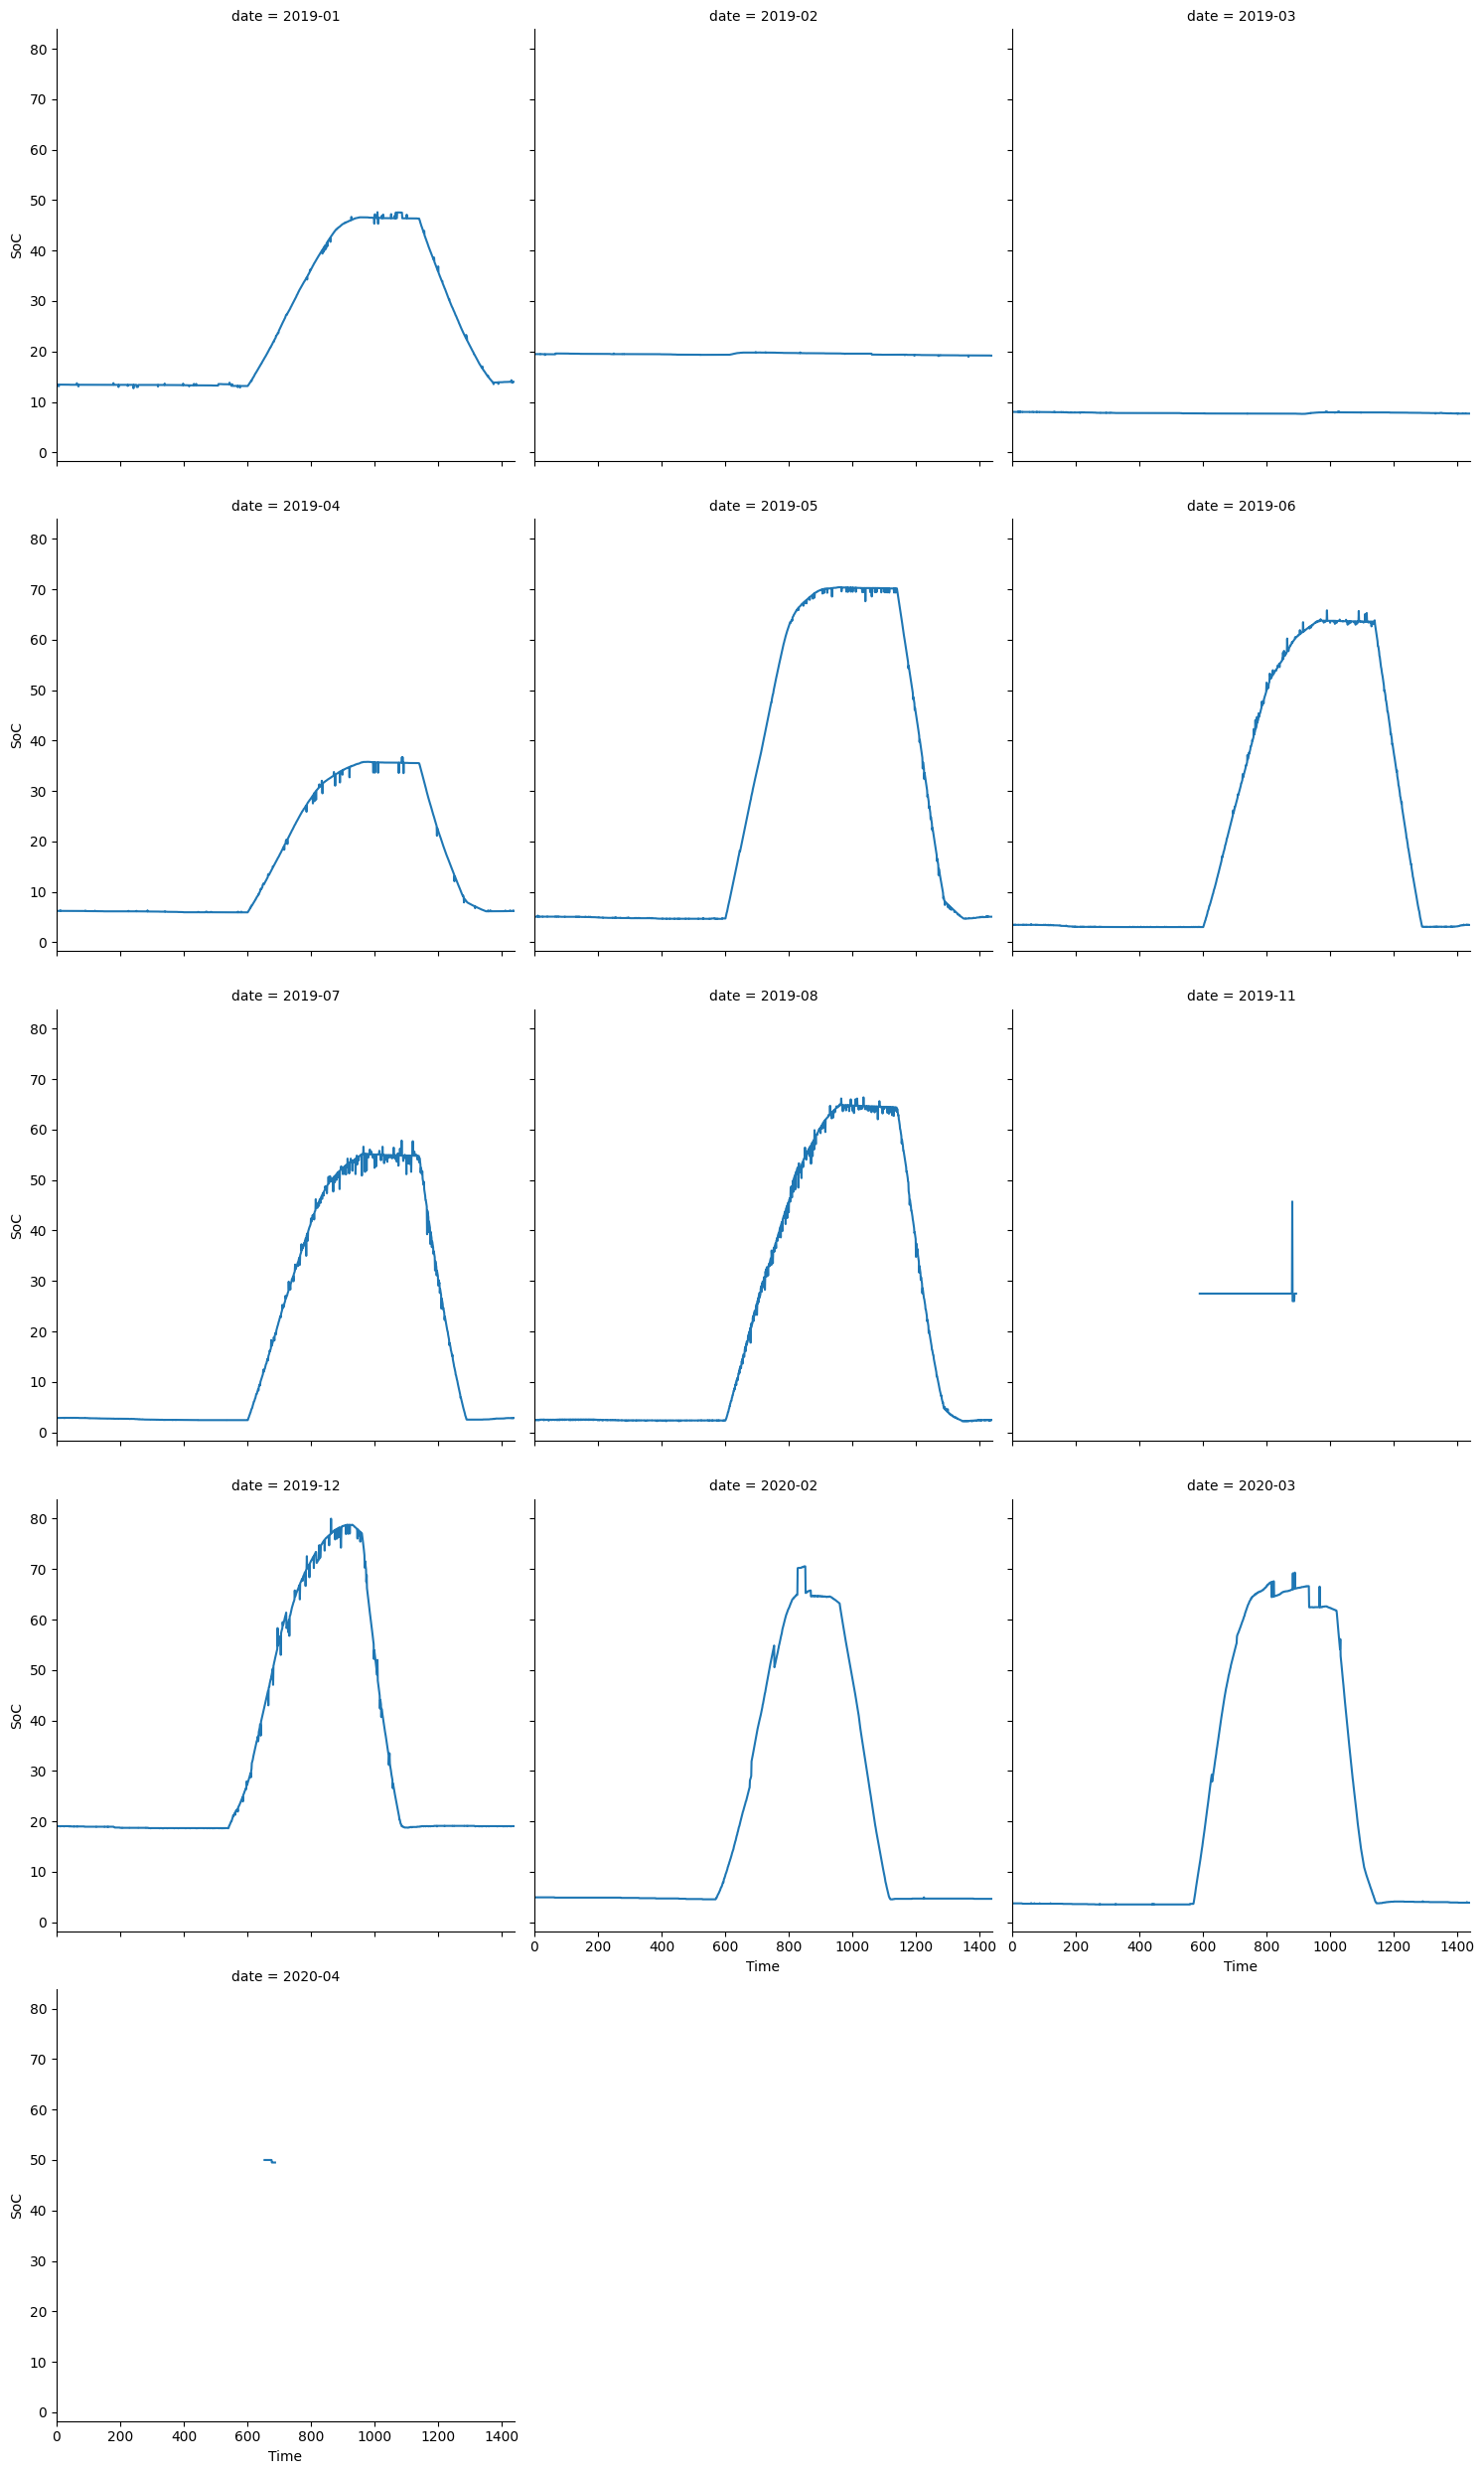

In [24]:
sns.relplot(data=normal_SoC_mean_racks_df, x='Time', y='SoC', col='date', col_wrap=3, kind="line")

plt.xlim((0, 1440))

plt.show()

In [25]:
racks_a_df = pd.read_csv(r'dataset\racks_a_total_dataset.csv', dtype={'EvtVnd1': object, 'EvtVnd2': object, 'EvtVnd3': object})

In [26]:
racks_a_df['Time'] = pd.to_datetime(racks_a_df['Time'])

In [27]:
df = racks_a_df.loc[:, ['Time',
                        'Tmp', 'TmpMax','TmpMin',
                        'VCell', 'VCellMax', 'VCellMin',
                        'A', 'AChaMax', 'ADisChaMax',
                        'EvtVnd1', 'EvtVnd2', 'EvtVnd3',
                        'SoC', 'V', 'Racks']]

In [28]:
normal_df = df[(df['EvtVnd1'].isna() & df['EvtVnd2'].isna() & df['EvtVnd3'].isna())]

In [29]:
normal_SoC_df = normal_df.loc[:, ['Time', 'SoC', 'Racks']]
# normal_SoC_df = normal_SoC_df.loc[(pd.Timestamp('2019-05-01') <= normal_SoC_df['Time']) & (normal_SoC_df['Time'] < pd.Timestamp('2019-09-01'))]
normal_SoC_df['date'] = normal_SoC_df['Time'].apply(lambda x: x.strftime('%Y-%m'))
normal_SoC_df['Time'] = normal_SoC_df['Time'].apply(lambda x: (x.hour * 60) + x.minute)
normal_SoC_df.drop(normal_SoC_df.loc[normal_SoC_df['SoC'] <= 0.0].index, inplace=True)
normal_SoC_df = normal_SoC_df.dropna()

In [30]:
normal_SoC_mean_racks_df = normal_SoC_df[normal_SoC_df['Racks'] == f'racks_0']
normal_SoC_mean_racks_df = normal_SoC_mean_racks_df.groupby(by=['date', 'Time'], as_index=False).agg({'SoC':'mean'})
normal_SoC_mean_racks_df = normal_SoC_mean_racks_df.reset_index(drop=True)

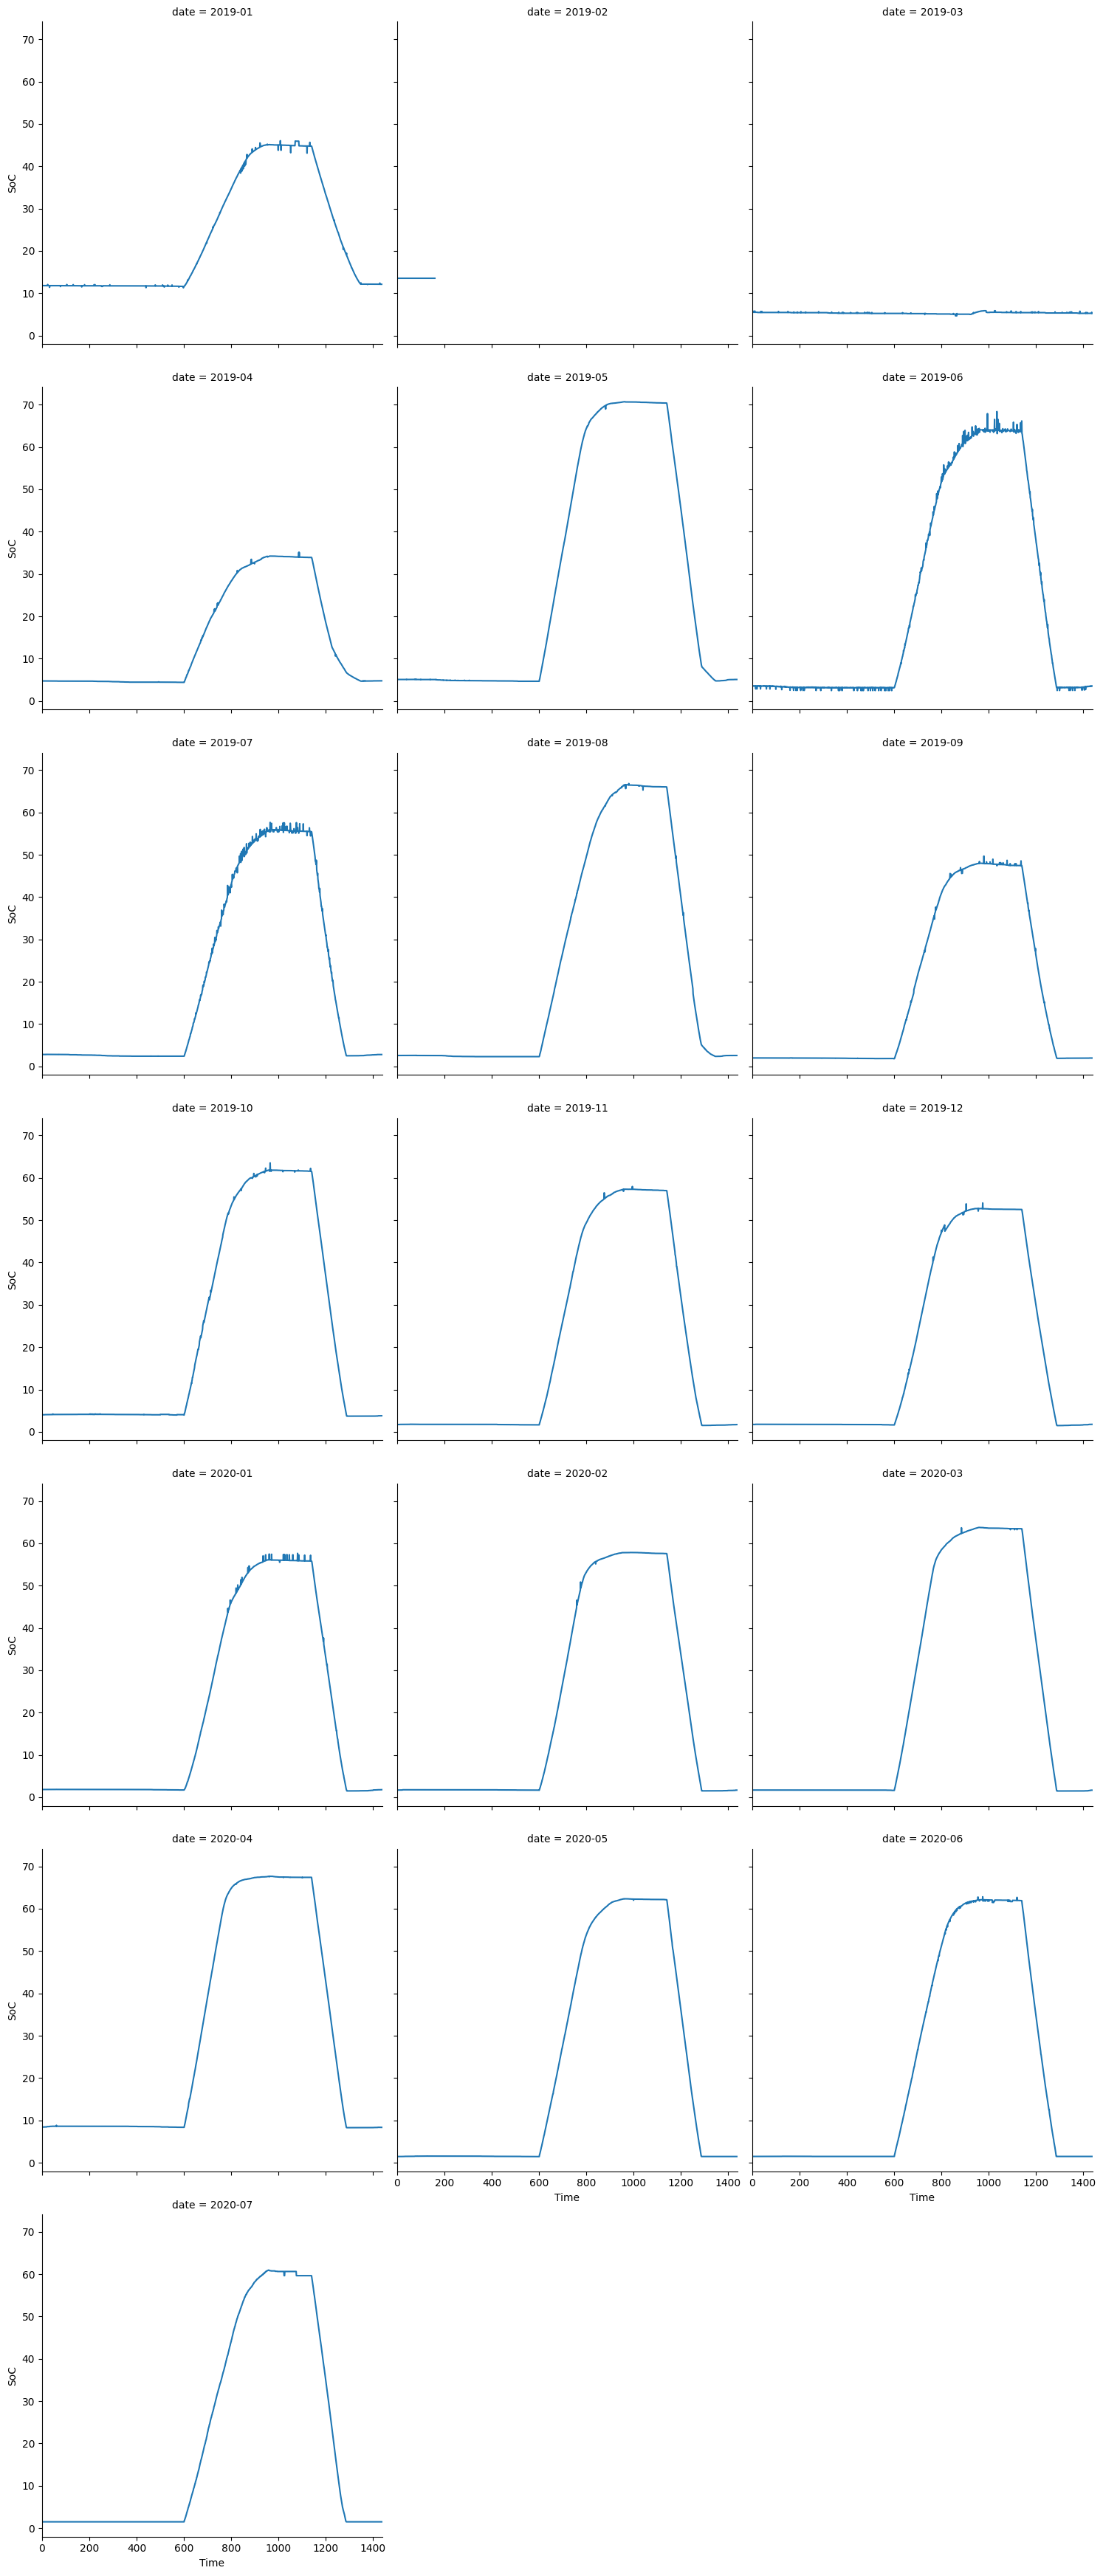

In [31]:
sns.relplot(data=normal_SoC_mean_racks_df, x='Time', y='SoC', col='date', col_wrap=3, kind="line")

plt.xlim((0, 1440))

plt.show()